# Classifying Images of the CIFAR-100 Dataset

<br />
<br />
<br />

![logo](https://eng.asu.edu.eg/archive/download/68238)

<br />
<br />
<br />
<br />
<br />
<br />
<br />

<center>
    <h3>
 Kareim Tarek Abdel-Azeem Amin        <strong> 1701002 </strong>
        </h3>
    <br />
    <h3>
 Isalm Mohammed Abdel-Aziz       <strong> 1700253 </strong>
        </h3>
</center>
<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />
<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />
<br /><br /><br /><br /><br /><br /><br /> <br />

## Index
- [Abstract](##Abstract)
- [Methods and Algorithms](##Methods-and-Algorithms)
- [Expiremental Results](##Expiremental-Results)
- [Discussion](##Discussion)
- [Appendix (codes)](##Appendix-(Codes))

## Abstract
Image classification is the objective of identifying whether the image belongs to a particular predefined class or not. It's of vital importance in this era. latest advances in that field enabled self driving cars to be a reality, doctors to detect deseases, and people with disabilities to have a better life. Image classification can be extended to Image detection - detect whether something exists in an image - , and image recognition - which is the ability of software to identify objects, places, people, writing and actions in images. In this paper we try to tackle the challange by providing two solutions to classify 100 classes in a large data set. we explain our methods, show the results, and discuss how we acheived them..

## Problem Definition
It's required to classify 100 classes of objects found in images of the CIFAR-100 dataset, which contains 50000 training example and 10000 test samples. Images are of size 32x32x3 RGB colored 3-channels images. 

## Solution
In this paper we propose to solutions to the classification problem:
- Multi-Class SVM: in the form of a shallow neural network with the number of hidden units (in the hidden layer) equal to the number of classes and using the *catagorical_hinge_loss* as the loss function of the model. The model acheives relatively poor performance which we try to enhance in the next proposed model.
- Deep Neurak Network: we introduce a deep neural network withseveral convoluntional layers  to extract and capture the many features of the images, which resulted in a better performance.


## Methods and Algorithms

### Programming Tools and APIs


- This Notebook is developed totally in **Python**, we used keras API of the **tensorflow 2.0** framework for building deeplearning models.
- we used the **Eager mode of tensorflow** via its sequential API for its simpilicity.
- **Numpy** for calculations
- **Pandas** for data preprocessing
- **matplotlib** for plotting figures
- **scikit-learn** for feature extraction



In [ ]:
!pip install -q numpy
!pip install -q pandas
!pip install -q tensorflow
!pip install -q matplotlib
!pip install -q scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Softmax
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn import preprocessing
from keras.utils import np_utils

### Getting the data
The Cifar-100 dataset was loaded from the datasets found in the keras API in tensorflow.

In [ ]:
images_data = tf.keras.datasets.cifar100

In [ ]:
(train_images, train_labels), (test_images, test_labels) = images_data.load_data()

As we can see, the training data is consists of 50000 samples and 10000 for the test data, also the labels are in sparse representation as apposed to one hot encoding.

In [ ]:
print( "training data dimensions: ", train_images.shape)
print( "training labels dimensions (sparse): ", train_labels.shape)
print( "test data dimensions: ", test_images.shape)
print( "test labels dimensions (sparse): ", test_labels.shape)

training data dimensions:  (50000, 32, 32, 3)
training labels dimensions (sparse):  (50000, 1)
test data dimensions:  (10000, 32, 32, 3)
test labels dimensions (sparse):  (10000, 1)


Here, we see a random image of the data of size 32x32x3

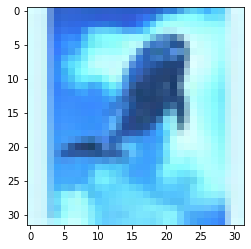

Image Label: [30]


In [ ]:
sample_img_idx = np.random.choice(train_images.shape[0])
img = train_images[sample_img_idx,:,:]
plt.imshow(img)
plt.show()
print(f"Image Label: {train_labels[sample_img_idx]}")

### Multi-Class Support Vector Machine (MCSVM)

#### Data preprocessing

##### Data Normalization: 
First, we normalize both the training and test data.

In [ ]:
train_images = train_images/255.0
train_images_flat = train_images.reshape(train_images.shape[0],-1)
train_images_flat.shape

(50000, 3072)

In [ ]:
test_images = test_images/255.0
test_images_flat = test_images.reshape(test_images.shape[0],-1)
test_images_flat.shape

(10000, 3072)

##### One Hot Endcoding: 
The catagorical_hinge loss function - provided by tensorflow - needs the labels to be one hot encoded, so we do the transformation.

In [ ]:
# Transform lables to one-hot encoding
transformed_train = np_utils.to_categorical(train_labels, 100)
transformed_test = np_utils.to_categorical(test_labels, 100)

Here, we show the difference.

In [ ]:
# Print results
print(f'Value without encoding: {test_labels[123]}')
print(f'Value with encoding: {transformed_test[123]}')

Value without encoding: [92]
Value with encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0.]


The new shape of the test, and train labels

In [ ]:
print( "training labels dimensions (OHE): ", transformed_train.shape)
print( "test labels dimensions (OHE): ", transformed_test.shape)

training labels dimensions (OHE):  (50000, 100)
test labels dimensions (OHE):  (10000, 100)


##### Feature Extraction:
Due to the high dimensional image data, we use PCA to capture 0.96 of the variance in the data.

In [ ]:
pca_cifar = PCA(0.96)

Here, we do the transformation using PCA in sklean library

In [ ]:
feat_cols = ['pixel'+str(i) for i in range(train_images_flat.shape[1])]
df_cifar = pd.DataFrame(train_images_flat,columns=feat_cols)
df_cifar['label'] = train_labels
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

This results in 251 components (features.)

In [ ]:
pca_cifar.n_components_

251

Here, we flatten the input features

In [ ]:
dd = df_cifar.iloc[:,:-1]
dd.shape

(50000, 3072)

Now, we do the transformation on the images

In [ ]:
%%capture
train_img_pca = pca_cifar.transform(train_images_flat)
test_img_pca = pca_cifar.transform(test_images_flat)

Here is the train and test data shape after PCA transformation

In [ ]:
train_img_pca.shape, test_img_pca.shape

((50000, 251), (10000, 251))

#### Model Architecture and Hyperparameters

- the loss function used is the categorical_hinge provided by tensorflow keras API which is effectively the loss function for multi-class support vector machine. more on that here: [tf.keras.losses.CategoricalHinge](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalHinge) and here: [How does multiclass hinge work?](https://www.machinecurve.com/index.php/2019/10/17/how-to-use-categorical-multiclass-hinge-with-keras/#how-does-multiclass-hinge-work)
![Hinge_loss_function](https://www.machinecurve.com/wp-content/uploads/2019/10/image-2.png)
- The learning rate set to 0.03 proved optimal as the default in tensorflow is 0.01 but SVMs need a little bigger.
- The optimizer used is Adam as Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems. [more info](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Specifically%2C%20you%20learned%3A,sparse%20gradients%20on%20noisy%20problems.)
- number of epochs is 30 as the model only overfits in latter iterations
- batch size of 128 proved to be optimal in terms of accuracy and runtime speed espicially when using GPUs for training. this batch size is relativly large - to make use of GPUs -, as smaller batch sizes tend to slow down training and don't make much use of the parallel hardware, thus most of th work will be sequential with longer time.
- here, we used 16% test, 8% validation, and 76% training data. this is because the scarcity of the data with respect to the 100 class number to be detected.

In [ ]:
%%capture
num_classes = 100
loss_function_used = 'categorical_hinge'
learning_rate_used = 0.03 # little bigger for SVMs
optimizer_used = tf.keras.optimizers.Adam(lr=learning_rate_used) # proved best
additional_metrics = ['accuracy'] # common metric
num_epochs = 30
batch_size = 128
validation_split = 0.1

# Set shape based on data
input_shape = (pca_cifar.n_components_,)

The model consists of one hidden layer with the number of nodes equal to the number of classes and a linear activation functions. we added a softmax layer because the 'categorical_hinge' loss function provided by tensorflow and keras needs its input to be in the form of probailities not logits (the vector of raw (non-normalized) predictions) which is produced by the MCSVM, so the softmax layer was used just as a mathematical transformation to generate a vector of (normalized) probabilities so we could use the loss function, but the activation function is still linear. [see also (Logits)](https://developers.google.com/machine-learning/glossary/#logits)

NOTE: Manual construction of shallow MCSVM to operate on logits directly without the softmax layer requires the use of the functional API of Keras and Tensorflow, which is complicated and error prone. We prefered to use a shortcut method to construct the model using off-the-shelf libraries as much as we can without affecting the model architecture. 

In [ ]:
model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(num_classes, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 251)               0         
                                                                 
 dense (Dense)               (None, 100)               25200     
                                                                 
Total params: 25,200
Trainable params: 25,200
Non-trainable params: 0
_________________________________________________________________


as we can see from the model summary the number of parametrs is 25,200 parameter which is not bad relative to the dataset, as a good rule of thumb the number of training examples should be at least 2x or 3x the number of parameters in order for the model parameters to converge and acheive good results.

### Deep Neural Network

#### Data preprocessing

We get a fresh copy of the data without the previous transformation done for the MCSVM using PCA.

In [ ]:
(input_train, target_train), (input_test, target_test) = images_data.load_data()

Next, Data normalization

In [ ]:
input_train = input_train.astype('float32')
input_train = input_train / 255

input_test = input_test.astype('float32')
input_test = input_test / 255

#### Model Architecture and Hyperparameters

Model Architecture: 
 This architecture was inspired by the VGG architectures. For the Conv-Net we start with large image size that decreases at deeper layers, while the number of filters increases. as we go deeper the model extracts more complex features, so we shrink the image representing less features but more complex ones (condensing the info). We also increase the number of filters because when the features are complex, more info can be extracted from it. The image size is decreased by max pooling layer of size 2x2 which is the common case, and 3x3 filters - also common - in computer vision. 

- we used sparse_categorical_crossentropy because it's a multi classification problem, and the data labels are in sparse representation [more info](https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy)
- we used the default learning rate in tensorflow which is 0.01, other values were not as good.
- The optimizer used is Adam as Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems. [more info](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Specifically%2C%20you%20learned%3A,sparse%20gradients%20on%20noisy%20problems.)
- number of epochs is 20 which were enough as the model only overfits in latter iterations
- batch size of 128 proved to be optimal in terms of accuracy and runtime speed espicially when using GPUs for training. this batch size is relativly large - to make use of GPUs -, as smaller batch sizes tend to slow down training and don't make much use of the parallel hardware, thus most of th work will be sequential with longer time.
- here, we used 16% test, 16% validation, and 68% training data.

In [ ]:
%%capture
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 20
optimizer = Adam()
validation_split = 0.2
verbosity = 1
input_shape = (img_width, img_height, img_num_channels)

The model Architecture consists of

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 256)       

### Learning rules
here we illustrate the learning rules for backpropagation although we prefered to use off-the-self libraries to deal with updating the parameters.

![bp1](https://i.ibb.co/RQrLyM8/bp1.png)
![bp2](https://i.ibb.co/BG1h7F0/bp2.png)
![bp3](https://i.ibb.co/8g8yX8H/bp3.png)
![bp4](https://i.ibb.co/4WnVhkH/bp4.png)
![bp5](https://i.ibb.co/bHb0QWW/bp5.png)
![bp6](https://i.ibb.co/KVb7v57/bp6.png)

## Expiremental Results

### Multi-Class Support Vector Machine (MCSVM)

After compiling the model we fit the training data to it

In [ ]:
model.compile(loss=loss_function_used, optimizer=optimizer_used, metrics=additional_metrics)
history = model.fit(train_img_pca, transformed_train, epochs=num_epochs, batch_size=batch_size, verbose=False, validation_split=validation_split)

The model performance is extracted and collected in the df dataframe. showing the first entries of it we can see loss is decreasing for the training set but oscillating for the validation set

In [ ]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.199623,0.036667,1.266308,0.0480
1,1.319518,0.059200,1.374252,0.0662
2,1.390443,0.081444,1.430853,0.0872
3,1.430934,0.106133,1.481419,0.0992
4,1.459638,0.125178,1.528923,0.1000


Now we plot the loss for the training data VS the loss for the validation data, we can see clearly that the model overfits due to the lack of the training data for such a high number of classes.

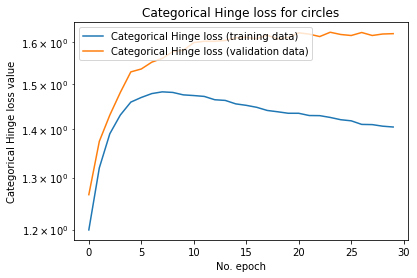

In [ ]:
plt.plot(history.history['loss'], label='Categorical Hinge loss (training data)')
plt.plot(history.history['val_loss'], label='Categorical Hinge loss (validation data)')
plt.title('Categorical Hinge loss for Shallow-Net of 1 layer')
plt.ylabel('Categorical Hinge loss value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Now, we plot the loss on the training data as the training progresses.

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

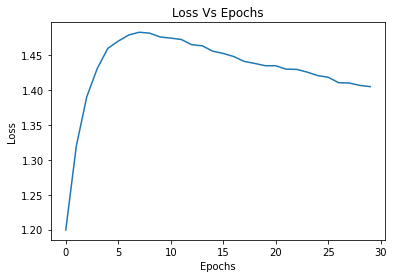

In [ ]:
loss_plot = df.plot(y='loss', title='Loss Vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

Now, we plot the accuracy acheived on the training data as the training progresses.

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

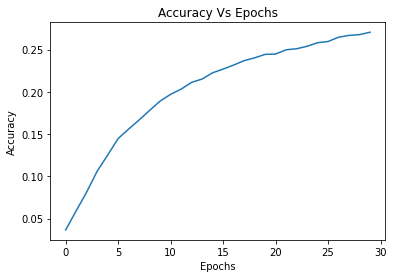

In [ ]:
acc_plot = df.plot(y='accuracy', title='Accuracy Vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

The results on the test set is similar as the validation set with accuracy of 16.42 percent

In [ ]:
test_loss, test_accuracy = model.evaluate(test_img_pca, transformed_test, verbose=2)

313/313 - 1s - loss: 1.6080 - accuracy: 0.1642 - 613ms/epoch - 2ms/step


### Deep Neural Network

We compile and fit the model as usual

In [ ]:
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
history = model.fit(input_train, target_train, batch_size=batch_size, epochs=no_epochs, verbose=verbosity, validation_split=validation_split)

The model performance is evaluated on the test data set and acheived 37.3%

In [ ]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.8781330585479736 / Test accuracy: 0.373199999332428


Now we plot the loss for the training data VS the loss for the validation data, we can see clearly that the model overfits due to the lack of the training data for such a high number of classes, and the large number of parameters

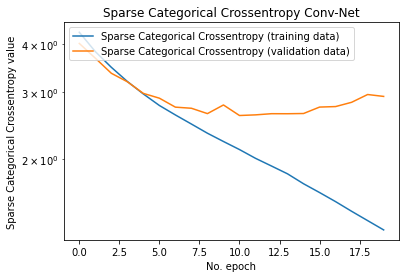

In [ ]:
plt.plot(history.history['loss'], label='Sparse Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Sparse Categorical Crossentropy (validation data)')
plt.title('Sparse Categorical Crossentropy Conv-Net')
plt.ylabel('Sparse Categorical Crossentropy value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
df = pd.DataFrame(history.history)

Now, we plot the loss on the training data as the training progresses.

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

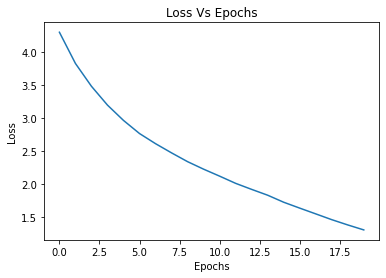

In [ ]:
loss_plot = df.plot(y='loss', title='Loss Vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

Now, we plot the accuracy acheived on the training data as the training progresses.

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

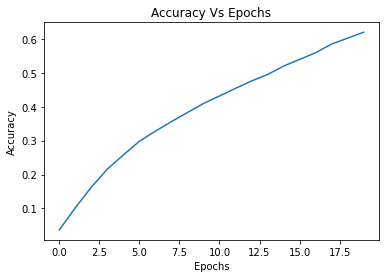

In [ ]:
acc_plot = df.plot(y='accuracy', title='Accuracy Vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

Clearly, the model overfits so we try dropout regularization so nodes in the layers will not depend on a particular feature.

We define our new model after normalization as follows:
- dropout with probaility 10%
- use random_normal he initialization which is suitable for relu activation function. the weights are concentraed around zero.

In [ ]:
drop = 0.1
init = 'he_normal'
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer=init))
model.add(Dropout(drop))
model.add(Dense(128, activation='relu', kernel_initializer=init))
model.add(Dropout(drop))
model.add(Dense(64, activation='relu', kernel_initializer=init))
model.add(Dropout(drop))
model.add(Dense(no_classes, activation='softmax'))

Compile and fit

In [ ]:
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
history = model.fit(input_train, target_train, batch_size=batch_size, epochs=10, verbose=verbosity, validation_split=validation_split)

Evaluate

In [ ]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.5210208892822266 / Test accuracy: 0.3612000048160553


The validation error and overfitting has been reduced significantly. We can see that early stopping could be useful if we increased the number of epochs. but it's not necessary in this case. also early stopping is not recommended as the model it does not allow the model to make use of all the training data. [See also](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/) 

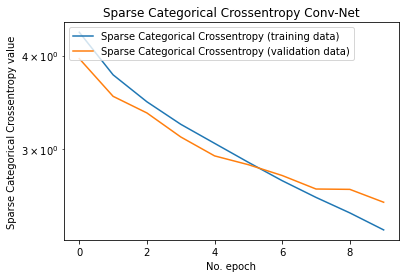

In [ ]:
plt.plot(history.history['loss'], label='Sparse Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Sparse Categorical Crossentropy (validation data)')
plt.title('Sparse Categorical Crossentropy Conv-Net')
plt.ylabel('Sparse Categorical Crossentropy value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
df = pd.DataFrame(history.history)

as usual the loss decreases VS the epochs while training

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

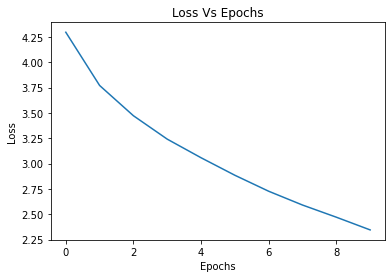

In [ ]:
loss_plot = df.plot(y='loss', title='Loss Vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

and the accuracy increases.

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

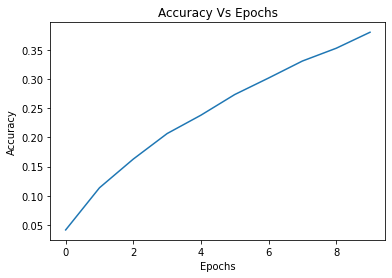

In [ ]:
acc_plot = df.plot(y='accuracy', title='Accuracy Vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

## Discussion

### Multi-Class Support Vector Machine (MCSVM)

Although the shallow Neural Network represents a simple model, adding the hinge loss for multi-class and using PCA as a feature extraction really helped performance. we can see that the model converges quickly and this is due to two reasons:
- PCA represents a good feature extraction where we captured 96 percent of the variance in the data
- the model is linear which makes it hard to get better results as epochs increase

### Deep Neural Network

At the beginnig the model acheived 37% performance on the test dataset but overfitted. we solved the problem by adding dropout regularization which helped but reduced the accuracy on the test dataset to be 36% which is not considerable. We can see the Conv-Nets extracted much better features which allowed the model to acheive some what good results for a large number of classes relative to the data set size.

## Appendix (Codes)

source code as a single python file can be downloaded from here: https://github.com/KareimGazer/Classify-Cifar-100/blob/main/ProjectReportFull.py